In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Balaji Fast Food Sales.csv")

In [3]:
data.sample(25)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
298,299,7/22/2022,Aalopuri,Fastfood,20,1,20,Online,Mrs.,Evening
283,284,1/29/2023,Frankie,Fastfood,50,7,350,NaN,Mr.,Afternoon
750,751,9/16/2022,Vadapav,Fastfood,20,2,40,Cash,Mr.,Afternoon
680,681,12-09-2022,Frankie,Fastfood,50,9,450,Online,Mrs.,Night
131,132,12-05-2022,Vadapav,Fastfood,20,4,80,Online,Mrs.,Night
321,322,05-05-2022,Cold coffee,Beverages,40,11,440,Cash,Mr.,Morning
294,295,7/21/2022,Sandwich,Fastfood,60,7,420,Cash,Mr.,Midnight
684,685,5/20/2022,Aalopuri,Fastfood,20,3,60,Cash,Mrs.,Afternoon
314,315,2/20/2023,Cold coffee,Beverages,40,13,520,Online,Mrs.,Afternoon
434,435,05-08-2022,Sandwich,Fastfood,60,1,60,Cash,Mrs.,Afternoon


In [4]:
data.isna().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
data.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [7]:
data.duplicated().sum()

0

In [39]:
# Filling Missing Values by mode value
data['transaction_type'].fillna(data['transaction_type'].mode()[0], inplace = True)

Text(0, 0.5, 'transaction amount total')

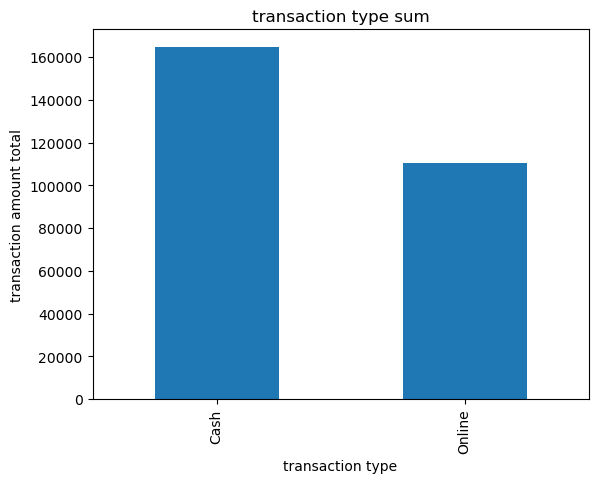

In [40]:
# Visualization 1: Transaction Amount by Transaction Type (Matplotlib)
transaction_type_totals=data.groupby("transaction_type")["transaction_amount"].sum()
transaction_type_totals.plot(kind="bar",title="transaction type sum",)
plt.xlabel("transaction type")
plt.ylabel("transaction amount total")

In [41]:
#while checking its visible that cash transactions are done more

<Axes: xlabel='time_of_sale', ylabel='count'>

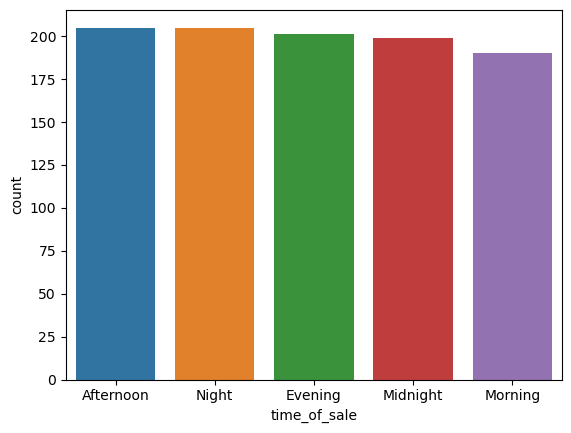

In [42]:
# Visualization 2: Transaction Time Distribution (Seaborn)
sns.countplot(x="time_of_sale",data=data,order=data["time_of_sale"].value_counts().index)

In [43]:
#food is mainly purchased more at night and afternoon
#other times are not less

Text(0.5, 0, 'Amount')

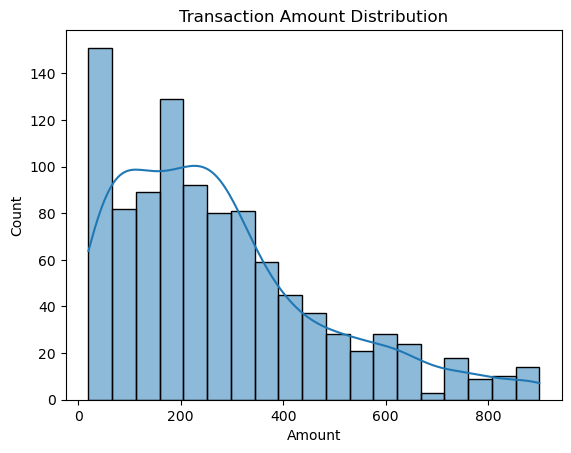

In [44]:
# Visualization 3: Item Price Distribution (Matplotlib)
sns.histplot(data['transaction_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')

In [45]:
data.head(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-01-04,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
523,524,2022-01-05,Aalopuri,Fastfood,20,13,260,Online,Mr.,Afternoon


<Axes: title={'center': 'item vs quantity'}, xlabel='item_name'>

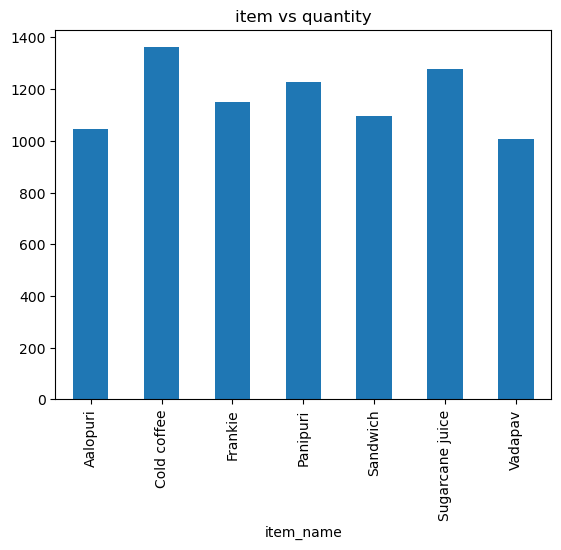

In [46]:
# Visualization 4: Item Name vs. Quantity (Matplotlib)
item_grp=data.groupby("item_name")["quantity"].sum()
item_grp.plot(kind="bar",title="item vs quantity")

In [47]:
#most sold item is cold coffee followed by sugar cane juice
#then comes panipuri and frankie
#compared to others less sold items is vadapav

Text(0, 0.5, 'Total Quantity Sold')

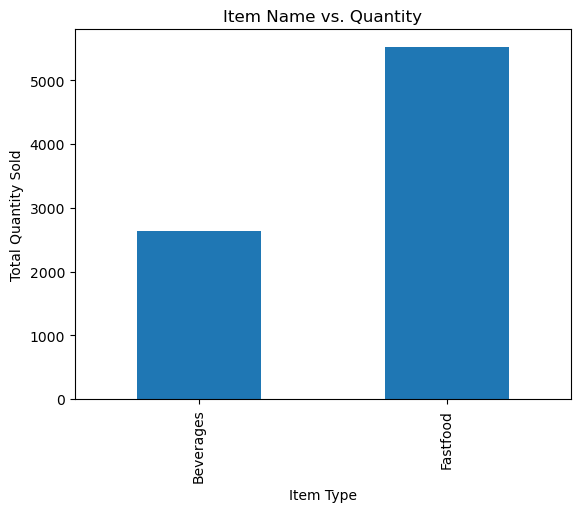

In [48]:
# Visualization 5: Item Name vs. Quantity (Matplotlib)
item_quantity = data.groupby('item_type')['quantity'].sum()
item_quantity.plot(kind='bar', title='Item Name vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

In [49]:
#fastfood is served more compared to beverages

In [50]:
# Visualization 6: Item Type Distribution (Plotly)
import plotly.express as px
fig = px.pie(data, names='item_type', title='Item Type Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15584\458400746.py:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




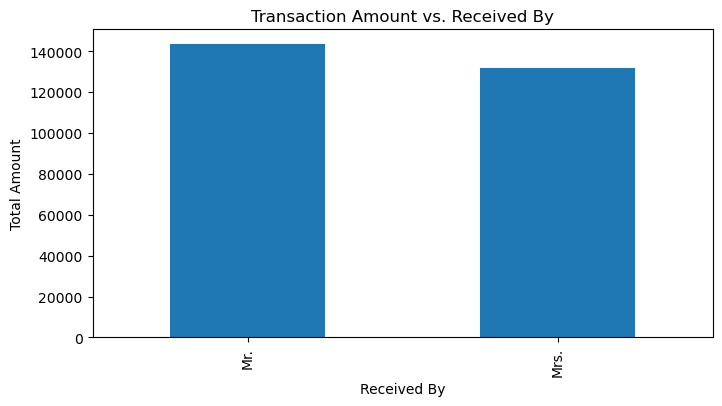

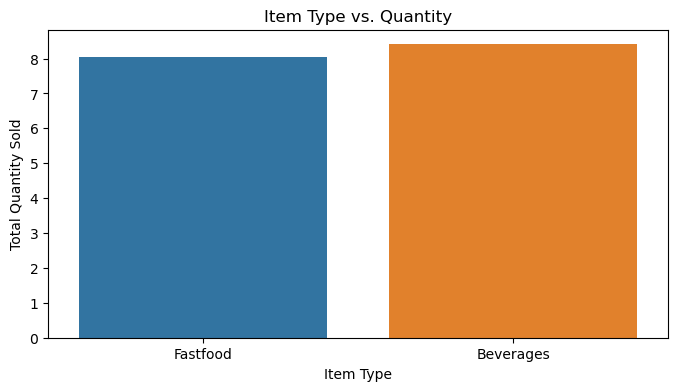

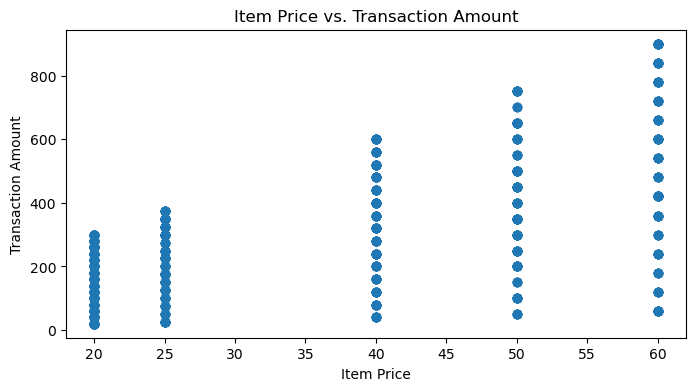

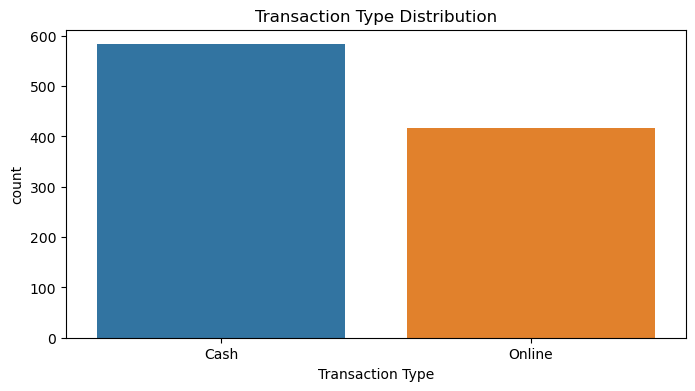

In [51]:
# Visualization 7: Transaction Amount vs. Transaction Type (Plotly)
fig = px.bar(data, x='transaction_type', y='transaction_amount', title='Transaction Amount vs. Transaction Type')
fig.update_layout(xaxis_title='Transaction Type', yaxis_title='Transaction Amount')

# Visualization 8: Transaction Amount vs. Received By (Matplotlib)
plt.figure(figsize=(8, 4))
received_by_totals = data.groupby('received_by')['transaction_amount'].sum()
received_by_totals.plot(kind='bar', title='Transaction Amount vs. Received By')
plt.xlabel('Received By')
plt.ylabel('Total Amount')

# Visualization 9: Item Type vs. Quantity (Seaborn)
plt.figure(figsize=(8, 4))
sns.barplot(x='item_type', y='quantity', data=data, ci=None)
plt.title('Item Type vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

# Visualization 10: Item Price vs. Transaction Amount (Matplotlib)
plt.figure(figsize=(8, 4))
plt.scatter(data['item_price'], data['transaction_amount'])
plt.title('Item Price vs. Transaction Amount')
plt.xlabel('Item Price')
plt.ylabel('Transaction Amount')

# Visualization 11: Transaction Type Distribution (Seaborn)
plt.figure(figsize=(8, 4))
sns.countplot(x='transaction_type', data=data, order=data['transaction_type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')

# Show the visualizations
plt.show()



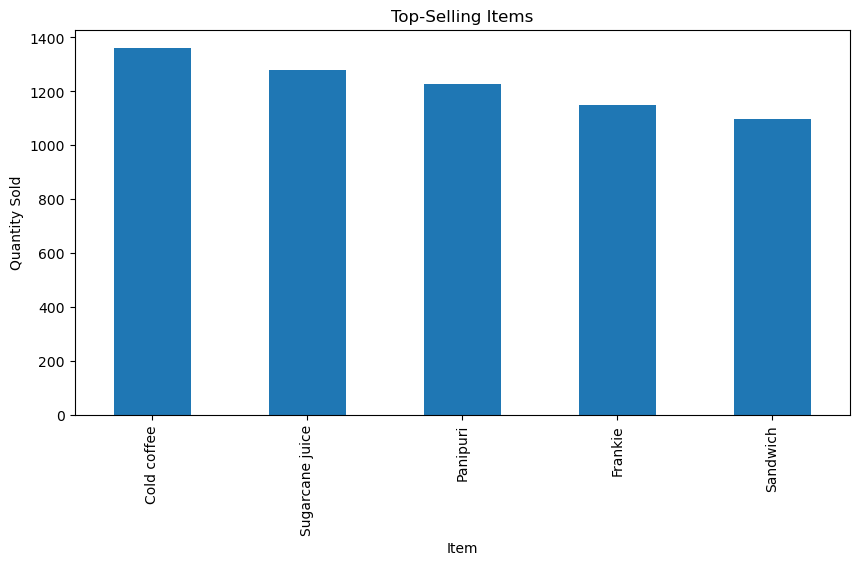

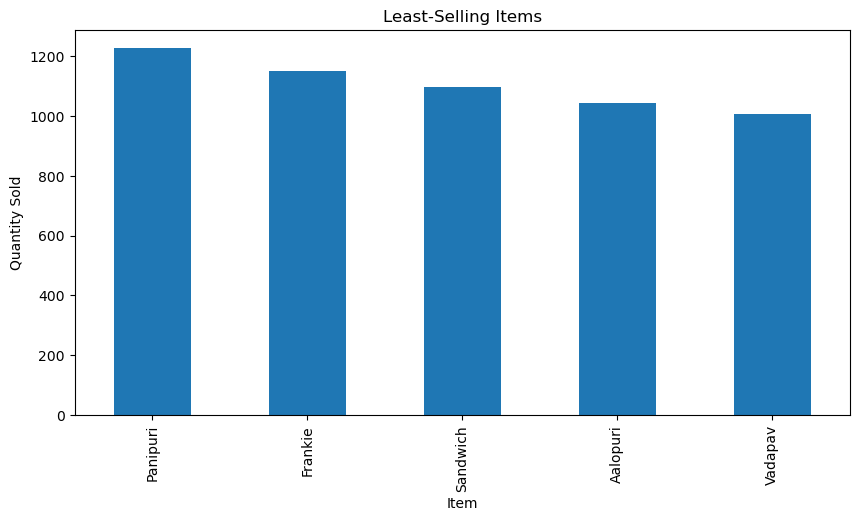

In [52]:

# Top-selling items
items_sold = data.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
top_items_sold = items_sold.head(5)

# Least-selling items
bottom_items_sold = items_sold.tail(5)

# Most expensive and least expensive items
average_price = data.groupby('item_name')['item_price'].mean()
top_items_price = average_price.sort_values(ascending=False).head(5)
bottom_items_price = average_price.sort_values().head(5)

# Visualization of top-selling items
plt.figure(figsize=(10, 5))
top_items_sold.plot(kind='bar')
plt.title('Top-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

# Visualization of least-selling items
plt.figure(figsize=(10, 5))
bottom_items_sold.plot(kind='bar')
plt.title('Least-Selling Items')
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.show()

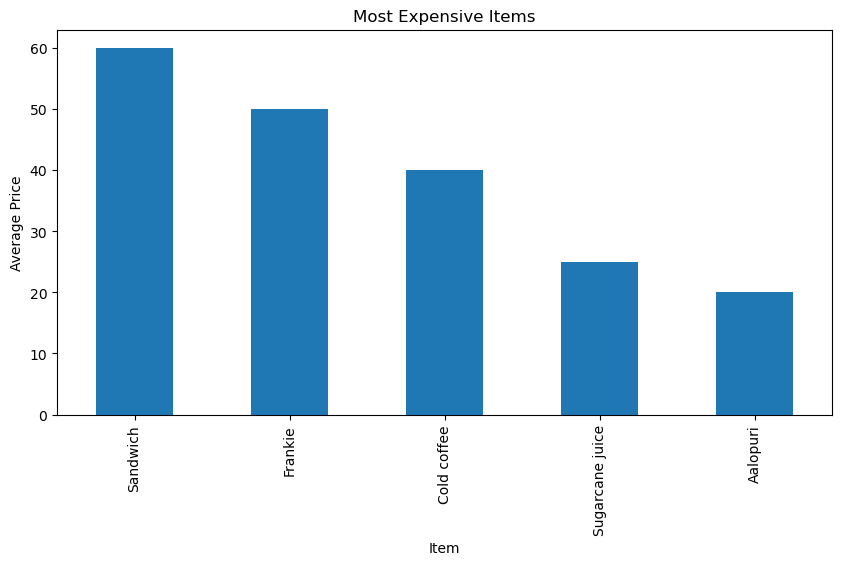

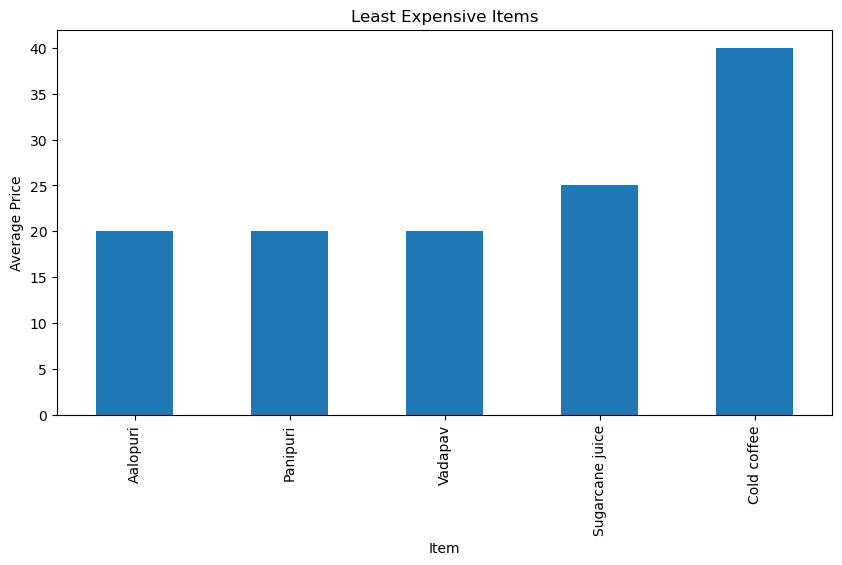

In [53]:
# Visualization of most expensive items
plt.figure(figsize=(10, 5))
top_items_price.plot(kind='bar')
plt.title('Most Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

# Visualization of least expensive items
plt.figure(figsize=(10, 5))
bottom_items_price.plot(kind='bar')
plt.title('Least Expensive Items')
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.show()

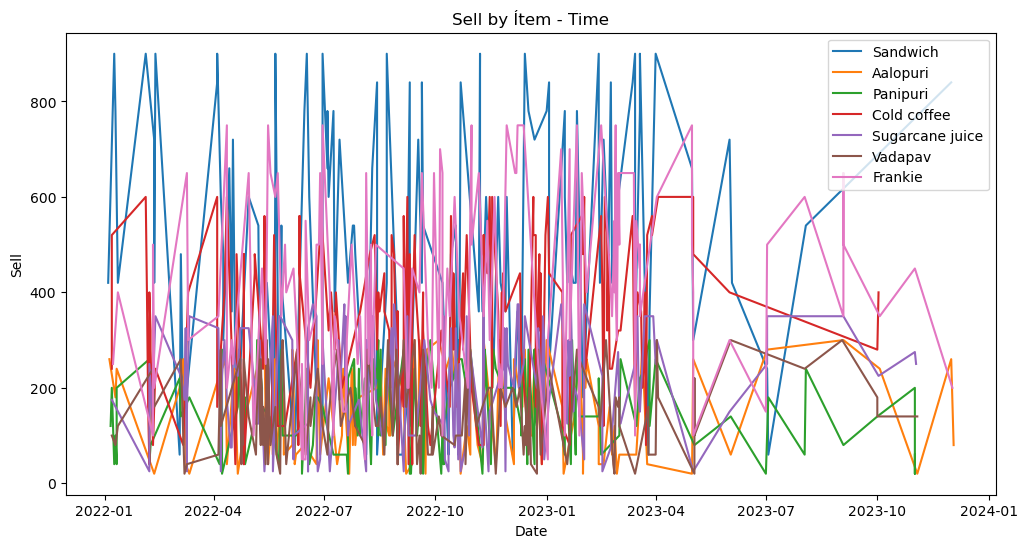

In [54]:
data['date'] = pd.to_datetime(data['date'])

data = data.sort_values('date')

plt.figure(figsize=(12, 6))
items = data['item_name'].unique()
for item in items:
    item_data = data[data['item_name'] == item]
    plt.plot(item_data['date'], item_data['transaction_amount'], label=item)

plt.title('Sell by Ítem - Time')
plt.xlabel('Date')
plt.ylabel('Sell')
plt.legend()
plt.show()

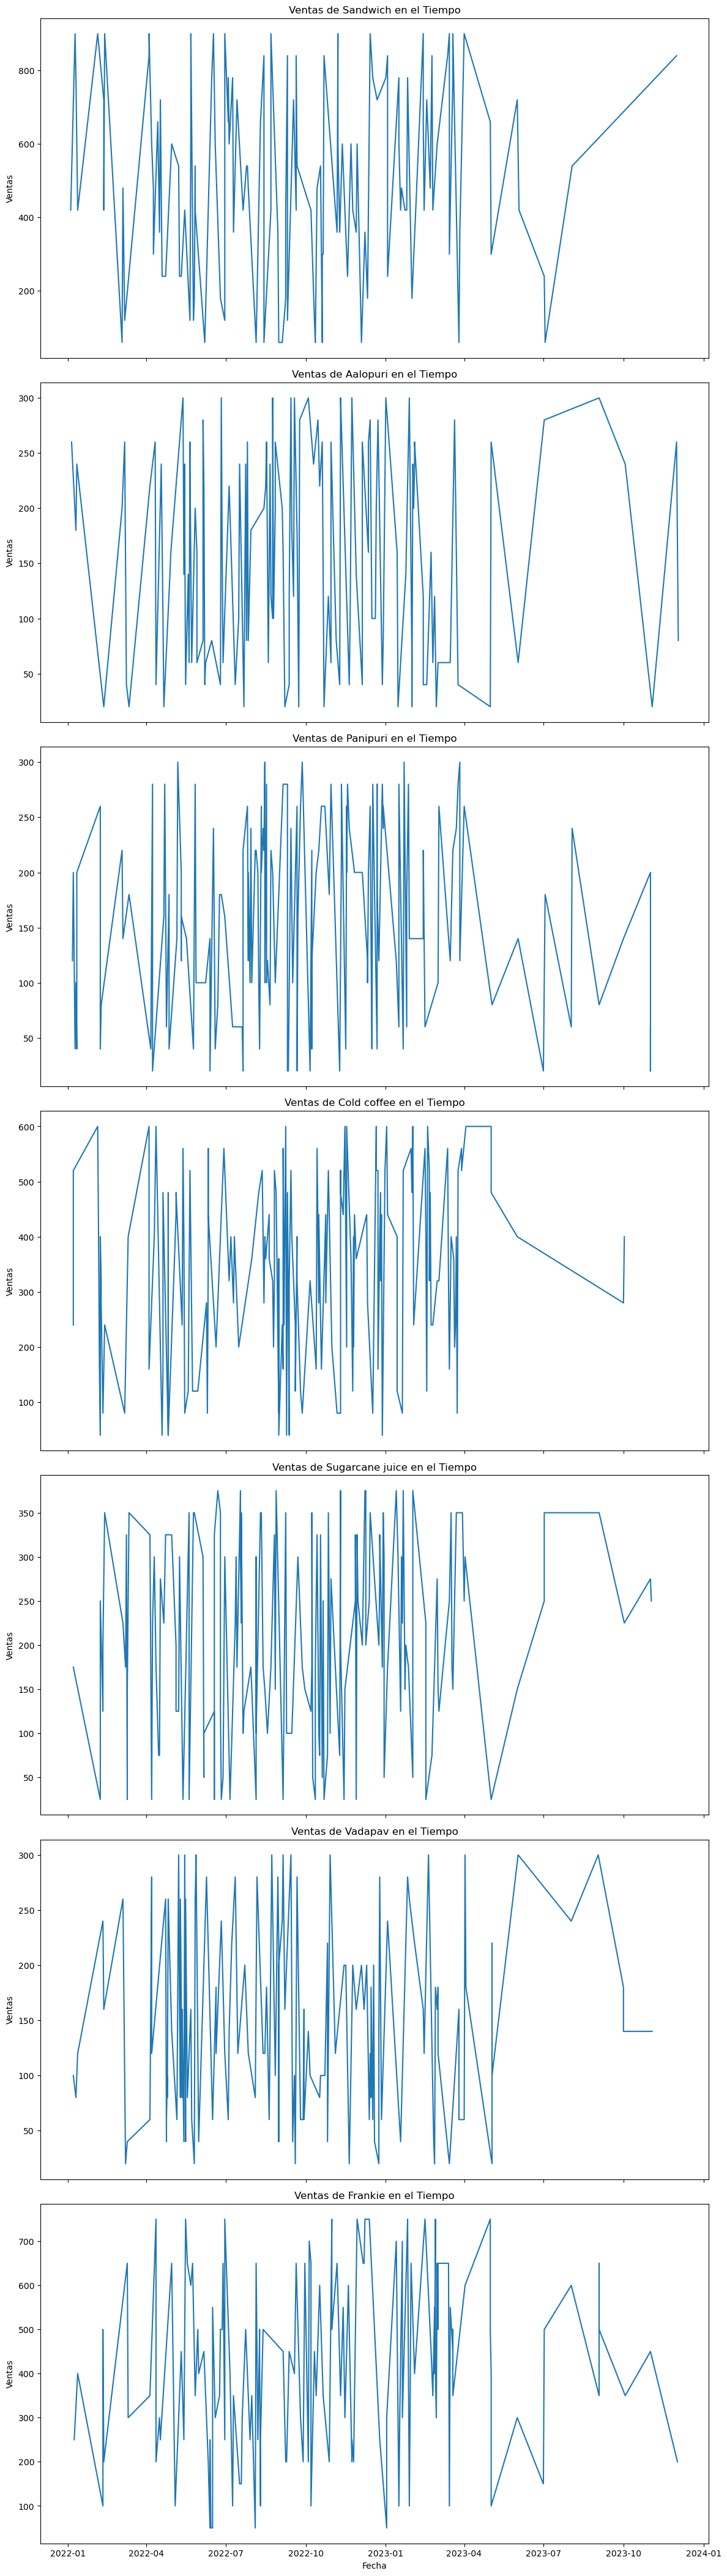

In [55]:
fig, axes = plt.subplots(len(items), 1, figsize=(12, 6 * len(items)), sharex=True)

for i, item in enumerate(items):
    item_data = data[data['item_name'] == item]
    axes[i].plot(item_data['date'], item_data['transaction_amount'])
    axes[i].set_title('Ventas de {} en el Tiempo'.format(item)) 
    axes[i].set_ylabel('Ventas')

plt.tight_layout()
plt.xlabel('Fecha')

plt.show()


In [56]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [57]:
data.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15584\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


In [58]:
#transaction amnt is showing +ve correlation towards item price and quantity

In [61]:
famous_items = data.pivot_table(index = 'item_name', values = ['order_id'], aggfunc = 'count').reset_index()

# Adding percentage columns
famous_items['Percentage Orders'] = np.round(100 * famous_items['order_id'] / len(data), 2)

# Renaming colums
famous_items.columns = ['item_name', 'total_orders', 'percentage_orders']

# Sorting data by total_orders
famous_items = famous_items.sort_values(by = 'total_orders', ascending = False)
famous_items

,item_name,total_orders,percentage_orders
1,Cold coffee,161,16.1
5,Sugarcane juice,153,15.3
3,Panipuri,150,15.0
2,Frankie,139,13.9
0,Aalopuri,134,13.4
6,Vadapav,134,13.4
4,Sandwich,129,12.9


In [62]:
# Item names with the revenue generated
most_profitable_item = data.groupby(by = 'item_name').agg({'transaction_amount': 'sum'}).reset_index()

# Sorting by descending order
most_profitable_item = most_profitable_item.sort_values(by = 'transaction_amount', ascending = False)

most_profitable_item['Revenue Contribution'] = np.round(100*
                                                most_profitable_item['transaction_amount'] / 
                                                most_profitable_item['transaction_amount'].sum(), 2)

most_profitable_item

,item_name,transaction_amount,Revenue Contribution
4,Sandwich,65820,23.91
2,Frankie,57500,20.89
1,Cold coffee,54440,19.78
5,Sugarcane juice,31950,11.61
3,Panipuri,24520,8.91
0,Aalopuri,20880,7.59
6,Vadapav,20120,7.31


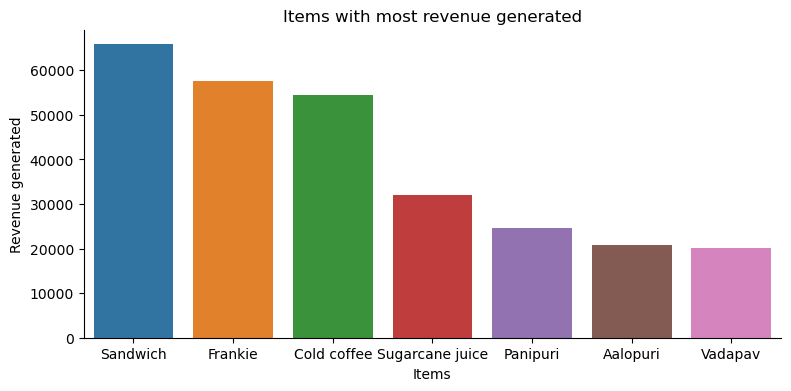

In [64]:
plt.figure(figsize = (9, 4))
sns.barplot(data = most_profitable_item, x = 'item_name', y = 'transaction_amount')

plt.title("Items with most revenue generated")
plt.xlabel("Items")
plt.ylabel("Revenue generated")

sns.despine()
plt.show()

### Insights:
Sandwich contributed 23% to the overall revenue.

when checking quantitioes sold sandwich was less in quantity,eventhough it contributed much to the revenue

In [65]:
# Adding year column
data['order_year'] = data['date'].dt.year

# Adding month column
data['order_month'] = data['date'].dt.month_name()

In [66]:
revenue_by_year = data.groupby(by = 'order_year').agg({'transaction_amount': 'sum'})
revenue_by_year

,transaction_amount
order_year,
2022,195575
2023,79655


In [67]:
#revenue was high in the year 2022

In [68]:
revenue_by_month = data.groupby(by = 'order_month').agg({'transaction_amount': 'sum'})
revenue_by_month

,transaction_amount
order_month,
April,21060
August,22965
December,22520
February,25520
January,25465
July,19450
June,19160
March,25120
May,26170


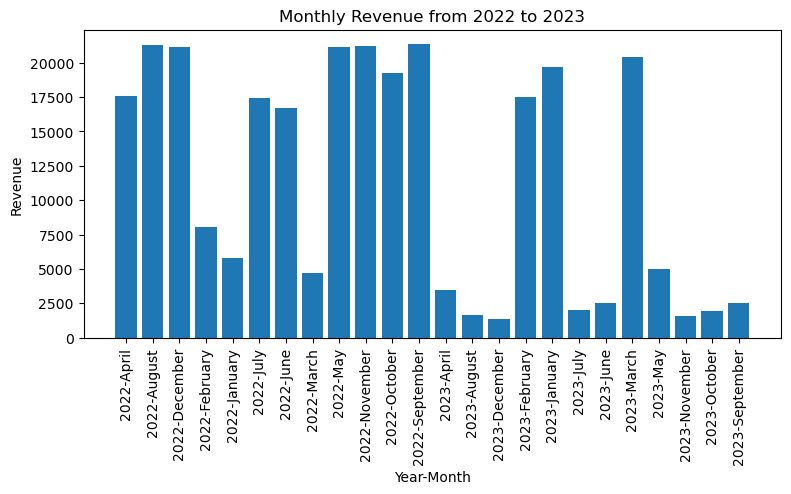

In [70]:
revenue_monthly = data.groupby(['order_year', 'order_month'])['transaction_amount'].sum()

# Reset the index to make 'order_year' and 'order_month' as columns
revenue_monthly = revenue_monthly.reset_index()

# Plot the revenue monthwise
plt.figure(figsize=(9, 4))
plt.bar(
    range(len(revenue_monthly)),
    revenue_monthly['transaction_amount'],
    tick_label=revenue_monthly.apply(lambda x: f'{x["order_year"]}-{x["order_month"]}', axis=1),
)
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue from 2022 to 2023')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='item_type', ylabel='count'>

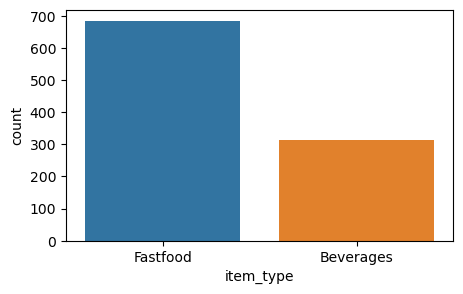

In [71]:
plt.figure(figsize = (5, 3))
sns.countplot(data = data, x = 'item_type')

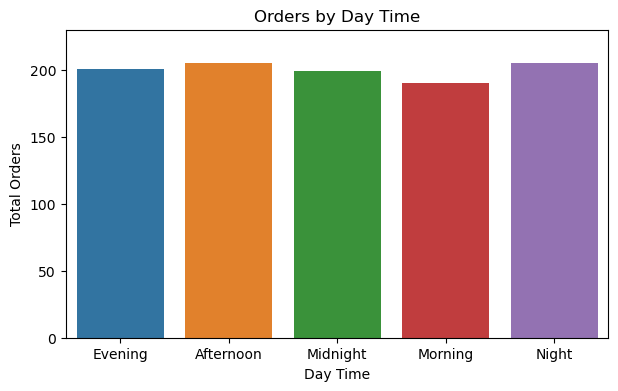

In [72]:
plt.figure(figsize = (7, 4))
sns.countplot(data = data, x = 'time_of_sale')

plt.title("Orders by Day Time")
plt.xlabel("Day Time")
plt.ylabel("Total Orders")

plt.ylim(0, 230)

plt.show()
